
# TP Matrices et Vecteurs: un peu d'alg√®bre lin√©aire

Durant cette s√©ance nous nous int√©ressons √† la manipulation de matrices et de vecteurs et nous aborderons des concepts g√©n√©raux en alg√®bre lin√©aire.

## Introduction

### Matrices
Tout d'abord notons que la cr√©ation d'une matrice $A$ de dimension $m \times n$ en Sage s'obtient par la commande 

`A=matrix(m,n,[[ligne1],[ligne2],...,lignem]])`

ou m est le nombre de ligne et n le nombre d'√©l√©ments dans une ligne (autrement dit n est le nombre de colonne). Par d√©faut, les √©l√©ments de cette matrice seront consid√©r√©s dans le domaine de d√©finition des √©l√©ments pass√© dans les lignes. Si m et n sont sp√©cifi√©s on peut simplement donner une seule liste de valeurs (pas besoin de liste de liste).

In [2]:
A1=Matrix(2,2,[[1,2],[3,4]]) # matrice sur des entiers (multipr√©cision)
A2=Matrix(2,2,[[1.0,2.0],[3.0,4.0]]) # matrice sur des flottants (double pr√©cision)
A3=Matrix(2,2,[1/7,2/5,3/8,4/5]) # matrice sur des rationnels (multipr√©cision)
var('a b c d')
A4=Matrix([[a,b],[c,d]]) # matrice sur des symboles
A5=Matrix(2,3) # matrice nulle sur des entiers par d√©faut

print("√©l√©ments de A1 :",A1.base_ring())
print("√©l√©ments de A2 :",A2.base_ring())
print("√©l√©ments de A3 :",A3.base_ring())
print("√©l√©ments de A4 :",A4.base_ring())
print("√©l√©ments de A5 :",A5.base_ring())

show(A1,A2,A3,A4,A5)

√©l√©ments de A1 : Integer Ring
√©l√©ments de A2 : Real Field with 53 bits of precision
√©l√©ments de A3 : Rational Field
√©l√©ments de A4 : Symbolic Ring
√©l√©ments de A5 : Integer Ring


[1 2]
[3 4] [1.00000000000000 2.00000000000000]
[3.00000000000000 4.00000000000000] [1/7 2/5]
[3/8 4/5] [a b]
[c d] [0 0 0]
[0 0 0]

- si les √©l√©ments sont diff√©rents, la coercion de type la plus englobante sera utilis√©e
- si on souhaite un type particulier, on sp√©cifit le domaine des d√©finitions des √©l√©ments comme premier argument

In [3]:
A6=Matrix([[1,2.0],[3/4,a]]) # coercion automatique
A7=Matrix(QQ,2,3) # force les √©l√©ments -> rationnel
A8=Matrix(RR,[[1,2.3],[3/4,-1]]) # force les √©l√©ments -> nbr flottant (double)

print("√©l√©ments de A6:",A6.base_ring())
print("√©l√©ments de A7 :",A7.base_ring())
print("√©l√©ments de A8 :",A8.base_ring())

show(A6,A7,A8)

√©l√©ments de A6: Symbolic Ring
√©l√©ments de A7 : Rational Field
√©l√©ments de A8 : Real Field with 53 bits of precision


[               1 2.00000000000000]
[             3/4                a] [0 0 0]
[0 0 0] [ 1.00000000000000  2.30000000000000]
[0.750000000000000 -1.00000000000000]

### Vecteurs
Cela marche de mani√®re identique pour les vecteurs avec la commande

`vector([e1,e2,...,em])`

Les vecteurs ne sont pas orient√©s, ils sont √† la fois ligne et colonnes, le choix se fera selon le contexte. 
Si l'on souhaite cr√©er des vecteurs d'une certaine dimension il faudra toujours donner le domaine de d√©finition des coefficients.

`vector(DD, [e1,e2,...,em])` ou `vector(DD,m)`

Si l'on souhaite orienter un vecteur, il suffira de cr√©er une matrice √† 1 ligne ou 1 colonne. 

In [4]:
v1=vector([1,2])
v2=vector(SR,[1,2])
v3=vector(RR,[1/3,2,5])
v4=vector(QQ,2)

print("√©l√©ments de v1:",v1.base_ring())
print("√©l√©ments de v2:",v2.base_ring())
print("√©l√©ments de v3:",v3.base_ring())
print("√©l√©ments de v4:",v4.base_ring())

v3R=Matrix(1,3,v3)
v3C=Matrix(3,1,v3)

show(v1,v2,v3,v4,v3R,v3C)

√©l√©ments de v1: Integer Ring
√©l√©ments de v2: Symbolic Ring
√©l√©ments de v3: Real Field with 53 bits of precision
√©l√©ments de v4: Rational Field


(1, 2) (1, 2) (0.333333333333333, 2.00000000000000, 5.00000000000000) (0, 0) [0.333333333333333  2.00000000000000  5.00000000000000] [0.333333333333333]
[ 2.00000000000000]
[ 5.00000000000000]

## Multiplication

L'operateur `*` permet de faire la multiplication des matrices et des vecteurs comme suit:
- un vecteur ligne avec un matrice: `v*A`
- une matrice avec un vecteur colonne: `A*v`
- un vecteur ligne avec un vecteur colonne (produit scalaire): `v1*v2`
- un vecteur colonne avec un vecteur ligne (produit ouvert): `v2*v1`
- un vecteur ou une matrice avec un scalaire : `a*A` ou `a*v` 

### Question
√Ä partir des matrices et des vecteurs suivants donner tous les produits possibles et afficher le domaine parmi (`ZZ`,`QQ`,`SR`) dans lequel a √©t√© effectu√© le calcul
$$
A=\begin{pmatrix} 1&2&3\\4&5&6\end{pmatrix}, B=\begin{pmatrix} 3&6&9\\1&2&4\\1&2&3\end{pmatrix}, u=\begin{pmatrix} 1&x&x^2 \end{pmatrix}, v=\begin{pmatrix} 8\\5 \\ 7/3\end{pmatrix}
$$


In [44]:
var('x')
A = matrix([[1,2,3],[4,5,6]])
B = matrix([[3,6,9],[1,2,4],[1,2,3]])
u = vector([1,x,x^2])
v = vector([8,5,7/3])
uH = matrix(1,3,u)
vV = matrix(3,1,v)

show("A*B = ",A*B," ",(A*B).base_ring())
show("A*vV = ",A*vV," ",(A*vV).base_ring())
show("B*B = ",B*B," ",(B*B).base_ring())
show("B*vV = ",B*vV," ",(B*vV).base_ring())
show("u*B = ",uH*B," ",(uH*B).base_ring())
show("u*v = ",uH*vV," ",(uH*vV).base_ring())
show("v*v = ",vV*uH," ",(vV*uH).base_ring())

'A*B = ' [ 8 16 26]
[23 46 74] ' ' Integer Ring

'A*vV = ' [25]
[71] ' ' Rational Field

'B*B = ' [24 48 78]
[ 9 18 29]
[ 8 16 26] ' ' Integer Ring

'B*vV = ' [  75]
[82/3]
[  25] ' ' Rational Field

'u*B = ' [    x^2 + x + 3 2*x^2 + 2*x + 6 3*x^2 + 4*x + 9] ' ' Symbolic Ring

'u*v = ' [7/3*x^2 + 5*x + 8] ' ' Symbolic Ring

'v*v = ' [      8     8*x   8*x^2]
[      5     5*x   5*x^2]
[    7/3   7/3*x 7/3*x^2] ' ' Symbolic Ring

## Combinaison lin√©aire de vecteurs

Si on consid√®re un ensemble de vecteurs colonnes $v_1,\dots,v_m$ tous de dimension $n$, et un ensemble de scalaires $\alpha_1,\dots, \alpha_m$, le calcul de la combinaison lin√©aire
$$
u = \alpha_1v_1+\alpha_2v_2+\dots+\alpha_mv_m
$$
est √©quivalent au calcul du produit d'une matrice $A$ de $n$ lignes et $m$ colonnes par un vecteur colonne de dimension $m$
$$
u=
\begin{pmatrix}
 &&&\\
 v_1 & v_2 & \dots& v_m\\
 &&&\\\
\end{pmatrix}
\begin{pmatrix}
\alpha_1 \\ \alpha_2 \\ \vdots \\\alpha_m
\end{pmatrix}
$$

### Question

Calculer la combinaison lin√©aire suivante :
$$
3 * \begin{pmatrix} 1 \\ 2 \\ 3 \end{pmatrix} 
-4 * \begin{pmatrix} 3 \\ 4 \\ 5 \end{pmatrix} +
5 * \begin{pmatrix} 6 \\ 7 \\ 8 \end{pmatrix} 
$$
en construisant la matrice $A$ et le vecteur colonne $v_1$ ad√©quat puis en faisant le produit $A\times v_1$. 

Vous ferez le m√™me calcul en construisant la matrice $B$ ad√©quate et le vecteur ligne $v_2$ en faisant le produit $v_2\times B$. 

V√©rifiez que $v_1$ et $v_2$ contienne bien les m√™mes valeurs mais qu'ils ne sont pas identiques.

In [48]:
A = matrix([[1,3,6],[2,4,7],[3,5,8]])
v1 = matrix(3,1,[3,-4,5])
show("A*v1 = ",A*v1)
B = matrix([[1,2,3],[3,4,5],[6,7,8]])
v2 = matrix(1,3,[3,-4,5])
show("v2*B = ",v2*B)

show("v1=",v1," v2=",v2," | Sont-ils identiques ? ->",bool((v1 is v2) or (v2 is v1)))

'A*v1 = ' [21]
[25]
[29]

'v2*B = ' [21 25 29]

'v1=' [ 3]
[-4]
[ 5] ' v2=' [ 3 -4  5] ' | Sont-ils identiques ? ->' False

### Transposition de matrice/vecteur

Les vecteurs $v_1$ et $v_2$ de la question pr√©c√©dente ne sont pas identiques car  ils sont orient√©s diff√©remment: un est en ligne alors que l'autre est en colonne. On dit qu'ils sont transpos√© l'un de l'autres.

L'op√©ration de tranposition d'un vecteur est donc le changement d'orientation. Cette notion s'√©tend aux matrices en consid√©rant qu'une matrice est une collection de vecteurs (soit en ligne, soit en colonne, les deux choix sont possibles). Par cons√©quent la tranposition d'une matrice consiste √† transposer les vecteurs la consistuant.

$$
A=
\begin{pmatrix}
 &&&\\
 v_1 & v_2 & \dots& v_m\\
 &&&\\\
\end{pmatrix}
 \rightarrow
 A^T= \begin{pmatrix}
 v_1^T \\ v_2^T \\ \vdots \\ v_m^T\\
\end{pmatrix}
$$

### Question

Essayer de trouver une propri√©t√© sur la transposition d'un produit en utilisant le fait que le vecteur $Av_1$ et $v_2B$ sont transpos√©s l'un de l'autre. Si vous ne trouvez pas regarder sur Wikip√©dia.

In [0]:
#Si A = B*x 
#alors A' = x'*B'
#alors A = (x'*B')'

## R√©solution de syst√®mes d'√©quations lin√©aires

La r√©solution d¬¥√©quation lin√©aire est une des op√©rations fondamentale en alg√®bre lin√©aire, et cela s'exprime facilement via la notion de produit matrice-vecteur. En effet, si l'on pose le syst√®me d'√©quation suivant:
\begin{equation}
\begin{cases}
6x+5y+z=3\\
2x-5+7z=-8\\
x+y+z=3
\end{cases}
\end{equation}
on peut r√©-√©xprimer ce probl√®me sous forme matricielle:
$$
\begin{pmatrix}
6 & 5 & 1\\
2 & -5 & 7\\
1 & 1 & 1 \\
\end{pmatrix}
\begin{pmatrix}x\\y\\z\end{pmatrix}
= \begin{pmatrix} 3\\-8\\3 \end{pmatrix}
$$

Pour r√©soudre un syst√®me d'√©quation lin√©aire donn√©er par l'√©quation matricielle $Av=b$,  il suffit d'appeler la m√©thode `A.solve_right(b)`. Si l'on souhaite r√©soudre √† gauche $vA=b$, on appelle `A.solve_left(b)`.

### Question

Trouver une solution au syst√®me donn√©e ci-dessus.
- en cherchant une solution dans les rationnels
- en red√©finissant le syst√®me sur le corps finis $GF(5)$. Attention, lisez bien les messages obtenus, surtout la derni√®re ligne.

In [59]:
A = matrix(3,3,[[6,5,1],[2,-5,7],[1,1,1]])
b = matrix(3,1,[3,-8,3])
v = A.solve_right(b)
show(v)

[-29/10]
[  29/8]
[ 91/40]

In [66]:
A = matrix(GF(5),[[6,5,1],[2,-5,7],[1,1,1]])
b = matrix(GF(5),[3,-8,3])
v = A.solve_left(b)
show(v)

[1 0 2]

### Question

En utilisant la m√©thode `solve_right` des matrices trouver l'√©quation des droites $y=\alpha x + \beta $ qui passe par les points:
- $(0,0)$ et $(3,5)$
- $(-1,2)$ et $(7,-3)$

Vous chercherez $\alpha$ et $\beta$ dans les rationnels et vous v√©rifierez vos r√©sultats en utilisant la fonction plot sur l'intervalle $[-10,10]$.

In [93]:
var('x')

Y = matrix(2,1,[0,5])
Eq = matrix(2,2,[[0,1],[3,1]])
sol = Eq.solve_right(Y)
a,b = sol[0][0],sol[1][0]
print("(0,0)&(3,5) -> a=",a," |¬†b=",b)
f1(x)=a*x+b

(0,0)&(3,5) -> a= 5/3  |¬†b= 0


In [94]:
Y = matrix(2,1,[2,-3])
Eq = matrix(2,2,[[-1,1],[7,1]])
sol = Eq.solve_right(Y)
a,b = sol[0][0],sol[1][0]
print("(‚àí1,2)&(7,‚àí3) -> a=",a," |¬†b=",b)
f2(x)=a*x+b

(‚àí1,2)&(7,‚àí3) -> a= -5/8  |¬†b= 11/8


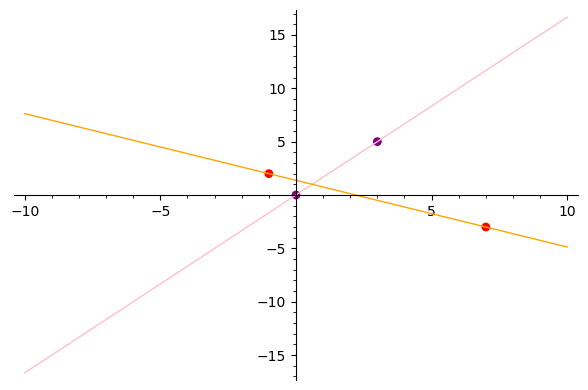

In [96]:
plot(f1,-10,10,color="pink")+plot(f2,-10,10,color="orange")+point([[0,0],[3,5]],color="purple",size=40)+point([[-1,2],[7,-3]],color="red",size=40)

### Interpolation de polyn√¥mes

De mani√®re plus g√©n√©rale, si on se donne un ensemble de $d$ points $(x_i,y_i)$ deux √† deux distinct et que l'on cherche l'unique polyn√¥me $P(x)=p_0+p_1x+p_2x^2+\dots + p_{d-1}x^{d-1}$ qui passe par tout ces points, cela se ram√®ne comme pr√©c√©demment √† une r√©solution de syst√®me lin√©aire.

En effet, on peut poser le syst√®me lin√©aire suivant pour trouver les coefficient $p_i$ de $P(x)$.
$$
\begin{pmatrix}
1 & x_1 & x_1^2 & x_1^3 & \dots & x_1^{d-1} \\
1 & x_2 & x_2^2 & x_2^3 & \dots & x_2^{d-1} \\
\vdots & \vdots & \vdots & \vdots& \ddots & \vdots\\
1 & x_d & x_d^2 & x_d^3 & \dots & x_d^{d-1} \\
\end{pmatrix}
\begin{pmatrix}
p_0 \\p_1 \\ p_2 \\ \vdots \\ p_{d-1} 
\end{pmatrix}
= 
\begin{pmatrix}
y_1 \\y_2 \\ y_3 \\ \vdots \\ y_{d} 
\end{pmatrix}
$$

### Question

Trouver le polyn√¥mes de degr√®s 4 √† coefficient rationnels qui passe par les points suivants:
$$(-2,3),(-1,7),(0,4),(3,1),(5,5)$$

Vous afficherez les points ainsi que la fonction $f(x)$ correspondant au polyn√¥me pour $x \in [-3,7]$.

In [127]:
p1,p2,p3,p4,p5 = [-2,3],[-1,7],[0,4],[3,1],[5,5]
P = [p1,p2,p3,p4,p5]

A = matrix([(1,p[0],p[0]^2,p[0]^3,p[0]^4) for p in P])
Y = matrix(5,1,[3,7,4,1,5])
show(A,"*X=",Y)

[  1  -2   4  -8  16]
[  1  -1   1  -1   1]
[  1   0   0   0   0]
[  1   3   9  27  81]
[  1   5  25 125 625] '*X=' [3]
[7]
[4]
[1]
[5]

In [125]:
var('x')
sol = A.solve_right(Y)
c0,c1,c2,c3,c4 = sol[0][0],sol[1][0],sol[2][0],sol[3][0],sol[4][0]
P(x) = c4*x^4 + c3*x^3 + c2*x^2 + c1*x + c0
show("P(x) :",P)

'P(x) :' x |--> -47/420*x^4 + 4/5*x^3 - 19/60*x^2 - 148/35*x + 4

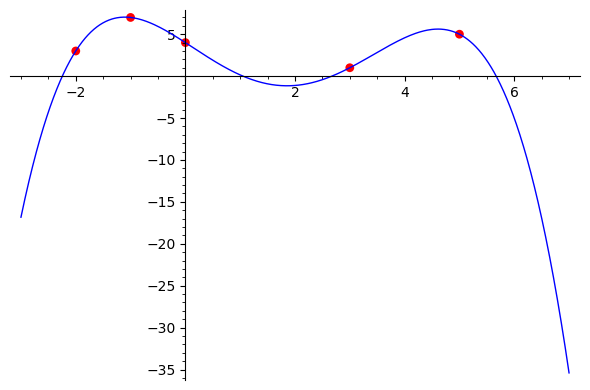

In [126]:
graph = plot(P,-3,7)+point([p1,p2,p3,p4,p5],size=40,color='red')
show(graph)

## M√©thode des moindres carr√©s


Si l'on consid√®re le syst√®me d'√©quation lin√©aires donn√©es par l'√©galit√© matricielle $Ax=b$ avec $A$ une matrice constitu√©e de $m$ lignes et de $n<m$ colonnes. Il n'existe pas de mani√®re g√©n√©rale une solution $x$ √† cette √©galit√©. Toutefois, on s'int√©resse √† trouver un vecteur $x$ tel que $Ax$ soit au plus proche de $b$. Pour cela on va utiliser la norme Euclidienne des vecteurs : soit $v=[v_1 v_2 \dots v_n]$ alors sa norme Euclidienne est  $|| v||_2 = \sqrt{v*v}=\sqrt{v_1^2+v_2^2+\dots+v_n^2}$.

Ainsi notre probl√®me se ram√®ne √† trouver le vecteur $x$ qui minimise $|| Ax-b||_2$.

Si la matrice $A$ a de bonnes propri√©t√©s (de rang maximal), alors la solution $x$ peut se calculer avec la r√©solution d'un autre syst√®me lin√©aire $Hx=c$ avec :
- $H=A^TA$
- $c=A^Tb$

### Question

En reprenant notre exemple pr√©c√©dent sur le calcul d'une droite  le probl√®me revient √† trouver l'√©quation d'un droite $y=\alpha x+\beta$ qui passe par plus que 2 points. Bien entendu si les points ne sont pas align√©s, il n'y a pas de solution. La m√©thode des moindres carr√©es permet ici de trouver l'√©quation d'une droite qui minimise l'√©cart entre la droite et les points.

Trouver quelle est la droite qui est la plus proche des points suivants:
$(-10, -37), (-6, -7), (-2, -21), (2, 9), (6, 3)$
Vous afficherez les points ainsi que la droite trouv√©e.


In [45]:
P = [[-10,-37],[-6,-7],[-2,-21],[2,9],[6,3]]
A = matrix(5,2,[(p[0],1) for p in P])
At = matrix(2,5,[[p[0]for p in P],[1,1,1,1,1]])
b = matrix(5,1,[p[1] for p in P])
H = At*A
c = At*b
show("A=",A)
show("b=",b)
show("At=",At)
show("H=",H)
show("c=",c)

'A=' [-10   1]
[ -6   1]
[ -2   1]
[  2   1]
[  6   1]

'b=' [-37]
[ -7]
[-21]
[  9]
[  3]

'At=' [-10  -6  -2   2   6]
[  1   1   1   1   1]

'H=' [180 -10]
[-10   5]

'c=' [490]
[-53]

In [37]:
var('x')
sol1 = H.solve_right(c)
a,b = sol1[0][0],sol1[1][0]

f(x) = a*x+b
show("f(x) : ",f)

'f(x) : ' x |--> 12/5*x - 29/5

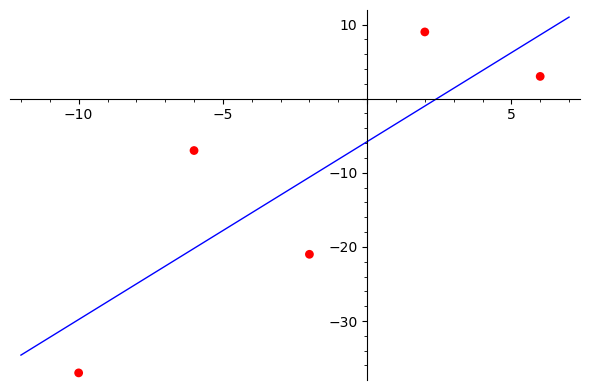

In [38]:
graph = point(P,color='red',size=40)+plot(f,-12,7)
show(graph)

### Question

Faite la m√™me chose pour trouver un polyn√¥me de degr√®s 3 qui est le plus proche des points suivants:
$(-2,3),(-1,7),(0,4),(3,1),(4,4),(5,5)$

Comme pr√©c√©mment vous afficherez les points ainsi que la fonction  ùëì(ùë•)  correspondant au polyn√¥me pour  $ùë•‚àà[‚àí3,7]$.

In [128]:
var('x')
P = [[-2,3],[-1,7],[0,4],[3,1],[4,4],[5,5]]
A = matrix(6,4,[(p[0]^3,p[0]^2,p[0],1) for p in P])
At = matrix(4,6,[[p[0]^3 for p in P],[p[0]^2 for p in P],[p[0]for p in P],[1,1,1,1,1,1]])
Y = matrix(6,1,[p[1] for p in P])
H = At*A
c = At*Y
show("A=",A)
show("Y=",Y)
show("At=",At)
show("H=",H)
show("c=",c)

'A=' [ -8   4  -2   1]
[ -1   1  -1   1]
[  0   0   0   1]
[ 27   9   3   1]
[ 64  16   4   1]
[125  25   5   1]

'Y=' [3]
[7]
[4]
[1]
[4]
[5]

'At=' [ -8  -1   0  27  64 125]
[  4   1   0   9  16  25]
[ -2  -1   0   3   4   5]
[  1   1   1   1   1   1]

'H=' [20515  4359   979   207]
[ 4359   979   207    55]
[  979   207    55     9]
[  207    55     9     6]

'c=' [877]
[217]
[ 31]
[ 24]

In [129]:
var('x')
sol2 = H.solve_right(c)
show(sol2)
a,b,c,d = sol2[0][0],sol2[1][0],sol2[2][0],sol2[3][0]

f(x) = a*x^3 + b*x^2 + c*x + d
show("f(x) : ",f)

[    209/1530]
[  -1603/3230]
[-12094/14535]
[    4927/969]

'f(x) : ' x |--> 209/1530*x^3 - 1603/3230*x^2 - 12094/14535*x + 4927/969

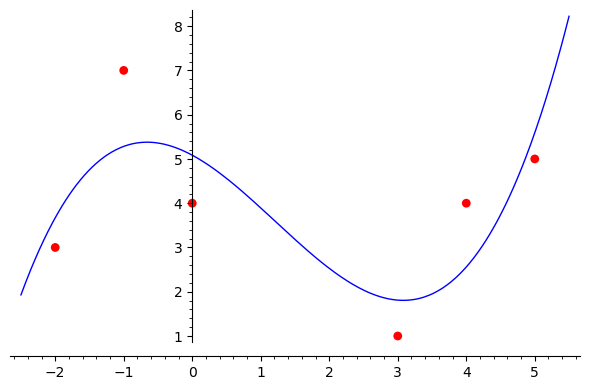

In [131]:
graph = point(P,color='red',size=40)+plot(f,-2.5,5.5)
show(graph)

## R√©√©criture d'un vecteur √† partir d'autres vecteurs.
√âtant donn√© un ensemble de vecteur $v_1,\dots,v_n$ on peut se poser la question de savoir si il est possible d'√©crire un autre vecteur $u$ √† partir de combinaison lin√©aire des vecteurs $v_i$. 


### question
On consid√©re les vecteurs √† coefficients dans le corps finis √† 3 √©l√©ments (`GF(3)` en Sage est √©quivalement aux entiers modulo 3) donn√©s ci-dessous
$$
v_1=\begin{pmatrix} 0 \\ 1 \\2 \end{pmatrix},
v_2=\begin{pmatrix} 1 \\ 0 \\1 \end{pmatrix},
v_3=\begin{pmatrix} 1 \\ 1 \\1 \end{pmatrix}
$$

Construisez la liste des vecteurs qui peuvent s'√©crire comme combinaison lin√©aire de $v_1,v_2,v_3$, c√¢d tous les vecteurs $\alpha_1 v_1 +\alpha_2  v_2 + \alpha_3 v_3$ avec $\alpha_1,\alpha_2,\alpha_3$ des scalaires dans $\{0,1,2\}$. Attention, les calculs doivent se faire modulo 3 et il faut √©viter les doublons. Combien de vecteurs trouvez vous ?


In [148]:
v1 = vector(GF(3),[0,1,2])
v2 = vector(GF(3),[1,0,1])
v3 = vector(GF(3),[1,1,1])

listeVecteur = [v1,v2,v3]
for a1 in range(0,3):
    for a2 in range(0,3):
        for a3 in range(0,3):
            v = a1*v1 + a2*v2 + a3*v3
            if(not(v in listeVecteur)):
                listeVecteur.append(v)
print(listeVecteur)
show("Il y a :",len(listeVecteur),": vecteurs !")

[(0, 1, 2), (1, 0, 1), (1, 1, 1), (0, 0, 0), (2, 2, 2), (2, 1, 2), (0, 2, 0), (2, 0, 2), (0, 1, 0), (1, 2, 1), (1, 2, 0), (2, 0, 1), (1, 1, 0), (2, 2, 1), (0, 0, 2), (2, 1, 1), (0, 2, 2), (1, 0, 0), (0, 2, 1), (1, 0, 2), (2, 1, 0), (1, 2, 2), (2, 0, 0), (0, 1, 1), (2, 2, 0), (0, 0, 1), (1, 1, 2)]


'Il y a :' 27 ': vecteurs !'

### question
Faite la m√™me chose avec en remplacant le vecteur $v_3$ par le vecteur $v_4=\begin{pmatrix} 1 \\ 1 \\0 \end{pmatrix}$. 
- Que remarquez vous ? 
- Essayer de donner une explication √† partir des valeurs de $v_1,v_2$ et $v_4$

In [157]:
v4 = vector(GF(3),[1,1,0])

listeVecteur = [v1,v2,v4]
for a1 in range(0,3):
    for a2 in range(0,3):
        for a4 in range(0,3):
            v = a1*v1 + a2*v2 + a4*v4
            if(not(v in listeVecteur)):
                listeVecteur.append(v)
print(listeVecteur)
show("Il y a :",len(listeVecteur),": vecteurs !")

[(0, 1, 2), (1, 0, 1), (1, 1, 0), (0, 0, 0), (2, 2, 0), (2, 1, 1), (0, 2, 1), (2, 0, 2), (1, 2, 2)]


'Il y a :' 9 ': vecteurs !'

In [158]:
print("v4 est combinaison lin√©aire de v1 et v2, on n'ajoute donc aucune possibilit√©. Cela revient √† faire l'ensemble des combinaisons lin√©aires avec v1 et v2 seulement.")

v4 est combinaison lin√©aire de v1 et v2, on n'ajoute donc aucune possibilit√©. Cela revient √† faire l'ensemble des combinaisons lin√©aires avec v1 et v2 seulement.


Vous venez d'entrevoir la notion de dimension d'un espace vectoriel, c'est √† dire le nombre minimal de vecteurs permettant de d√©finir cet espace. Autrement dit, la taille d'une famille libre de cet espace. Cette information est accessible en construisant la matrice constitu√©es des vecteurs donn√©es et en calculant son rang: `A.rank()` ou `A` est une matrice.

### Question 
Construisez les matrices $A_1$ et $A_2$ √† partir des vecteurs $v_1,v_2,v_3$ et $v_4$ donn√©es pr√©c√©demment.
Les lignes de $A_1$ correspondent √† $v_1,v_2,v_3$ et celles de $A_2$ √† $v_1,v_2,v_4$. 
Retrouver le nombre de vecteurs des questions pr√©c√©dentes √† partit du rang de ces matrices.


In [163]:
A1 = matrix([v1,v2,v3])
A2 = matrix([v1,v2,v4])
show(A1,A2)

[0 1 2]
[1 0 1]
[1 1 1] [0 1 2]
[1 0 1]
[1 1 0]

Pour d√©duire la d√©pendance entre les vecteurs, on peut s'appuyer sur la m√©thode 'right_kernel()' qui pour une matrice donn√©e $A \in \mathbb{K}^{m \times n}$ retourne l'espace des vecteurs de $\mathbb{K}^n$ qui annule cette matrice par multiplication √† droite. C'est √† dire 

$$
\operatorname{kernel}(A) =v \in \mathbb{K}^n \mbox{ tel que } Av = 0 \in \mathbb{K}^m
$$

Attention, cet espace de vecteur est consid√©r√© par Sage comme un objet alg√©brique. Il faut donc utiliser la m√©thode 'basis_matrix()' pour r√©cup√©rer une matrice d√©finissant une base de cet espace.

### Question
Retrouvez la combinaison lin√©aire entre $v_1,v_2$ et $v_4$ trouver pr√©c√©demment. Vous utiliserez `print` pour afficher l'√©galit√©.

In [162]:
print(1*v1 + 1*v2 ,'=', v4)

(1, 1, 0) = (1, 1, 0)


## M√©thode d'√©limination de Gauss
Bien √©videmment, la m√©thode de calcul exhaustif  employ√©e pr√©c√©demment ne peut √™tre utilis√©e si l'on consid√®re un domaine de calul de taille infini comme les entiers ou les rationnels, ou m√™me avec une espace fini de grande taille comme les flottants double pr√©cision. En effet, la complexit√© est exponentielle en le nombre de vecteurs.

La m√©thode d'√©limination de Gauss, aussi appel√©e pivot de Gauss, est une solution algorithmique qui permet de rester dans une complexit√© polynomiale pour calculer la d√©pendance lin√©aire de vecteurs. L'id√©e est tr√®s simple: l'objectif est de rendre certaines entr√©es d'un vecteur √† 0 en faisant des combinaisons lin√©aire 2 √† 2.

Par exemple, avec $v_1=[1,2,3]$ et $v_2=[1,4,5]$ √† coefficient dans les entiers, on a $v_1-v_2=[0 -2 -2]$. Par construction, on sait que  l'ensemble des combinaisons lin√©aires de $v_1,v_2$ est √©quivalent √† celui de $v_1,v_1-v_2$ ou $v_1-v_2, v_2$.
Comme $v_1-v_2$ a un zero dans sa 1√®re composante et que ce n'est pas le cas de $v_1$ ou $v_2$ alors il est lin√©airement ind√©pendant de $v_1$ et $v_2$.

Le proc√©d√© de l'√©limination de Gauss consite donc √† ajouter √† un vecteur $v$ un multiple d'un autre vecteur $u$, tel qu'une composante du nouveau vecteur soit nul. L'√©limination de Gauss est l'algorithme qui est utilis√© par la fonction `basis_matrix()`. Nous allons d√©couvrir comment fonctionne cet algorithme.

### Question
√âcrire une fonction `combineVect(u,v,i)` qui prend en entr√©e deux vecteur $u$ et $v$ de m√™me dimension $n$ tel que $i<n$ et $u[i]\neq 0$. Cette fonction retourne un nouveau vecteur $r=v+\alpha u$ tel que l'entr√©e en position $i$ du vecteur $r$ soit nulle.  

Vous testerez votre fonction sur les lignes de la matrice $A$ suivante d√©finie sur $\mathbb{Q}$:

$$A=
\begin{pmatrix}
2/3 & 1 & 5 \\
1 & 1/5 & 8 \\
5 & 1/2 & 3/4
\end{pmatrix}.
$$
Votre objectif est de modifier la matrice pour mettre des zero sous la diagonale. 
En notant $l_0, l_1$ et $l_2$ les lignes de la matrice A, on va devoir:
- ajouter un multiple de $l_0$ √† $l_1$ et $l_2$ pour mettre un 0 dans leur 1√®re composante
- ajouter un multiple de $l_1$ √† $l_2$ pour mettre un 0 dans sa 2√®me composante

*Aide: on r√©cup√®re une copie de la ligne i avec la m√©thode `A.row(i)`*

In [3]:
def combineVect(v,u,i):
    a = solve([v[i]+x*u[i]==0],x)
    r = v + a[-1].rhs()*u
    return r

In [4]:
l0 = vector([2/3,1,5])
l1 = vector([1,1/5,8])
l2 = vector([5,1/2,3/4])
A = matrix([l0,l1,l2])
show("A initial ->",A)

l1 = combineVect(l1,l0,0)
l2 = combineVect(l2,l0,0)
l2 = combineVect(l2,l1,1)
A = matrix([l0,l1,l2])
show("A final ->",A)

'A initial ->' [2/3   1   5]
[  1 1/5   8]
[  5 1/2 3/4]

'A final ->' [     2/3        1        5]
[       0   -13/10      1/2]
[       0        0 -2051/52]

De mani√®re plus g√©n√©rale, pour savoir si un vecteur $u$ peut s'√©crire comme une combinaison lin√©aire d'autres vecteur $v_1, \dots, v_m$, il suffit de construire la matrice

$$
A=
\begin{pmatrix}
&&v_1&&\\
&&v_2&&\\
&&\vdots&&\\
&&v_m&&\\
&&u&&
\end{pmatrix}
$$
est d'essayer de mettre des zero sous la diagonale comme pr√©c√©demment. Si apr√®s ce proc√©d√© la derni√®re ligne de $A$ est nulle alors $u$ peut s'√©crire comme une combinaison lin√©aire des $v_i$.

### Question
√âcrire un  fonction `dependanceLineaire([v1,...,vm,u])` qui teste si le vecteur $u$ peut s'√©crire comme une combinaison lin√©aire des vecteurs $v_i$. Autrement dit, la fonction cherche une d√©pendance lin√©aire entre le dernier vecteur de la liste et tous les autres

Pour √©crire votre fonction, vous proposerez une g√©n√©ralisation du calcul fait √† la question pr√©c√©dente.

Vous testerez votre fonction avec la liste $L= [v_3,v_2, v_1,u]$ pour $u=[2,1,2]$.

In [5]:
def dependanceLineraire(L):
    for i in range(len(L)-2):
        for j in range(len(L)-1):
            if(not(i+j+1 >= len(L))):
                L[i+j+1] = combineVect(L[i],L[i+j+1],i)
    return(L==[[0]*len(L[0])]*len(L))

In [6]:
v1 = vector([0,1,2])
v2 = vector([1,0,1])
v3 = vector([1,1,1])

bool(dependanceLineraire([v3,v2,v1,vector([2,1,2])]))

IndexError: list index out of range

Tester votre fonction en inversant l'ordre des √©l√©ments de la liste: $L= [v_1,v_2, v_3, u]$. *Attention, il est normal que votre fonction ne marche pas.*

Votre fonction ne marche plus car il n'est pas garantie que lors l'appel √† la fonction `combineVect` l'entr√©e $A[i,i]$ sur la diagonale de la matrice soit non nulle. Lorsque ce probl√®me arrive, il suffit de trouver une ligne $j>i$ de la matrice $A$ telle que $A[j,i]\neq 0$ et d'√©changer ces deux lignes. La fonction `A.swap_rows(i,j)` vous permettra de faire cette √©change. Si il n'y aucune ligne √† √©changer cela signifie que toutes les i-√®me composantes sont toutes nulles et qu'on peut donc changer de composante qu'on doit mettre √† 0. Attention, on n'√©chanche pas avec la derni√®re ligne qui correspond √† $u$.

### Question
√âcrire une nouvelle fonction `dependanceLineaire([v1,...,vm,u])` qui prenne en compte ces √©changes de lignes. Vous la testerez sur l'exemple pr√©c√©dent qui ne fonctionnait pas (votre fonction doit retourner `true` pour cet exemple). 

### Question
Tester votre nouvelle fonction sur la liste $L= [v_4,v_2, v_1, u]$. Votre fonction doit retourner `false` pour cet exemple).

On souhaite maintenant trouver les valeurs de la combinaison lin√©aire
permettant de r√©√©crire un vecteur $u$ en fonction des vecteurs $[v_1,\dots,v_m]$, lorsque cela est possible, c√¢d $u= \alpha_1 v_1+\alpha_2 v2 + \dots + \alpha_m v_m$.

Pour cela il va falloir conserver toutes les r√©√©criture des lignes qui sont faites avec les appels √† la fonction `combineVect`. En effet, √† chaque √©tape `i` on a calcul√© $u=u+\alpha_i v_i$ tel que $u[i]$ soit nul mais les vecteur $v_i$ ont eux aussi √©t√© modifi√©s de telle sorte que  $v_i= v_i+\sum_{k<i} \beta_k v_k$. Il faut donc pouvoir conserver la r√©-√©criture de tous les $v_i$. Une facon simple de conserver ces r√©√©critures est de faire le calcul sur la matrice augment√©e √† droite par une matrice identit√© de taille $m+1$.

$$
A=
\begin{pmatrix}
&&v_1&& 1&&&&\\
&&v_2&& &1&&&\\
&&\vdots&&&&\ddots&&\\
&&v_m&& &&&1&\\
&&u&& &&&&1
\end{pmatrix}
$$

Si on applique notre m√©thode pour mettre des z√©ro sous la diagonale, la matrice identit√© conservera toutes les r√©√©criture des vecteurs. En particulier, la derni√®re ligne permettra de trouver facilement les coefficients $\alpha_i$ demand√©s.

### Question
Proposer une nouvelle fonction `findDependanceLineaire(u,[v1,...,vm])` qui retourne le vecteur $[\alpha_1,\dots,\alpha_m]$ tel que $u=\alpha_1v_1+\dots+\alpha_mv_m$. Si il n'y pas de d√©pendance lin√©aire vous renverrez `None`.

Vous v√©rifierez votre r√©ponse pour $L= [v_3,v_2, v_1,u]$ et $L= [v_4,v_2, v_1,u]$

## Rang d'une matrice avec l'√©limination de Gauss

La m√©thode d'√©limination de Gauss vu pr√©c√©demment permet √©galement d'inverser une matrice (quand elle est inversible). Attention, l'inverse d'une matrice $A$ n'existe que si $A$ est carr√©e et que toutes les lignes sont lin√©airement ind√©pendantes. On retrouve encore la notion de rang. 

Le rang d'une matrice est le nombre minimal de lignes (ou de colonnes) qui permet de repr√©senter la famille
des vecteurs lignes (ou colonnes) d√©finie par la matrice.


### Question
On peut facilement modifier la m√©thode de Gauss vu pr√©c√©demment pour calculer le rang puisqu'il suffit encore une fois de mettre des z√©ros sous la diagonale. La diff√©rence est que maintenant on s'autorise √† faire des √©changes de lignes avec la derni√®re ligne. √Ä l'issue de l'√©limination, il suffit de compter le nombre de lignes non-nulles pour avoir le rang.

√âcrire une fonction `myRank(A)` qui calcule le rang de A en utilisant l'√©limination de Gauss vu pr√©c√©demment.


### Question
Construisez des matrices al√©atoires rectangulaires de taille $m \times n$ qui ne sont pas de rang maximal. Vous v√©rifierez que leur rang est $< \operatorname{min}(m,n)$ et qu'il est identique √† celui calcul√© par la methode `rank` de Sage.  **Aide:** pour construire une matrice $A$ de rang non maximal, il suffit de construire une matrice al√©atoire $B$ de taille plus petite que A et de rajouter des lignes ou des colonnes qui seront des combinaisons lin√©aires des lignes (ou colonnes) de B. 

**Rappel:** lorsque'on multiplie deux matrices A et B, leur produit r√©pr√©sente √† la fois:
- une combinaison lin√©aire des colonnes de A
- une combinaison lin√©aire des lignes de B

## Inversion d'une matrice par Gauss

Pour inverser une matrice carr√©, nous allons reprendre la m√©thode d'√©limination de Gauss utilis√©e pour trouver les combinaisons lin√©aires de vecteurs. Cette fois-ci on va augmenter la matrice √† droite avec une matrice identit√© et on va essayer de mettre de zero au dessus et au-dessous de la diagonale et √©galement mettre des 1 sur la diagonale.

$$
A=
\begin{pmatrix}
* & * & * & * \\
* & * & * & * \\
* & * & * & * \\
* & * & * & * \\
\end{pmatrix}
\Longrightarrow
\begin{pmatrix}A & I \end{pmatrix} =
\begin{pmatrix}
* & * & * & * & 1& & & \\
* & * & * & * &  &1 & &\\
* & * & * & * &  &  &1 &\\
* & * & * & * &  &  & &1\\
\end{pmatrix}
$$

$$
\Longrightarrow
Gauss(
\begin{pmatrix}A & I \end{pmatrix}) =
\begin{pmatrix}
 1& & & & * & * & * & * \\
  &1 & & & * & * & * & * \\
  &  &1 & & * & * & * & * \\
  &  & &  1& * & * & * & * \\
\end{pmatrix}= \begin{pmatrix}I & A^{-1} \end{pmatrix} 
$$

Comme pr√©c√©demment, on utilisera la fonction `combineVect` pour modifier une ligne en lui ajoutant un multiple d'une autre pour mettre un zero √† une certaine position. Pour mettre un 1 en position $(i,i)$ dans la matrice $A$, il suffit de multiplier la ligne $i$ de A par l'inverse de l'√©l√©ment $A[i,i]$.

### Question

√âcrire la fonction `myInverse(A)` qui calculer l'inverse d'une matrice carr√©e. Attention, vous devrez v√©rifier en premier que la matrice est carr√©. Bien entendu, il faudra s'assurer que la matrice est bien inversible, mais l'√©limination de Gauss nous permettra de le savoir. En effet, il suffira de v√©rifier qu'√† la fin de l'algorithme vous obtenez bien la matrice identit√© sur la partie gauche de la matrice augment√©e. Si telle est le cas, la matrice est inversible et son inverse est dans la partie droite de la matrice augment√©e, sinon cela signifie que la matrice n'est pas inversible.


## Une formule r√©cursive  pour le calcul de l'inverse

En consid√©rant la matrice  $ A= 
\begin{pmatrix}
a & b\\
c & d\\
\end{pmatrix}
\,\mbox{et le symbole }\,
S=d-ca^{-1}b
$

on peut facilement d√©finir l'inverse 
$$
A^{-1}= 
\begin{pmatrix}
1 & -a^{-1}b\\
0 & 1\\
\end{pmatrix}
\begin{pmatrix}
a^{-1} & 0\\
0 & S^{-1}\\
\end{pmatrix}
\begin{pmatrix}
1 & 0\\
-ca^{-1} & 1\\
\end{pmatrix}
$$




### Question

En utilisant le domaine `SymbolicRing` (`SR`) prouver la formule donn√©e pr√©c√©demment (de deux mani√®res diff√©rentes).


### G√©n√©ralisation de la r√©currence aux matrices
√Ä partir de cette formule d'inversion de matrice $2\times 2$, nous pouvons  d√©finir un algorithme r√©cursif.
En effet, si la dimension $n$ d'une matrice $H$ est paire alors on peut d√©couper la matrice $H$ en 4 blocs correspondants √† des matrices de taille $\frac{n}{2}\times\frac{n}{2}$

$$
H=
\begin{pmatrix}
A & B\\
C & D\\
\end{pmatrix}
$$

On peut donc appliquer la formule ci-dessus pour calculer l'inverse en calculant r√©cursivement $A^{-1}$ et $S^{-1}= (D-CA^{-1}B)^{-1}$. Bien entendu, la r√©currence ne sera valide que si $n=2^k$ et elle s'arr√®tera pour $n=1$ o√π il est facile de retourner l'inverse.

### Question

D√©fininir la fonction `myInverseRec(H)` qui calcule l'inverse de la matrice $H$ en appliquant la m√©thode ci-dessus. Cette fonction ne marchera que pour des dimensions de matrices qui seront des puissances de 2.

### Question
Tester votre fonction pour des matrices al√©atoires de taille $2^k$ pour $1<k<8$ √† coefficient dans le corps finis √† 65537 √©l√©ments `GF(65537)`.

### Question

En utilisant la fonction `%time` comparer le temps de calcul de vos deux fonctions `myInverse` et `myInverseRec`